# Changing Environment Data Exploration

In [2]:
# Imports
%matplotlib inline
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
# A few relevant paths/settings
data_dir = "../data/chg_env"
chg_env_data_fpath = os.path.join(data_dir, "mt_final_fitness.csv")

In [4]:
# Load data
df = pd.read_csv(chg_env_data_fpath, dtype={"benchmark":str,"treatment":str,"run_id":str,"analysis":str,"fitness":float})

In [5]:
# Subset the data a bit
comb_fdom_df = df[df["analysis"].str.contains("fdom")]
fdom_2 = comb_fdom_df[comb_fdom_df["treatment"].str.contains("ENV2")]
fdom_4 = comb_fdom_df[comb_fdom_df["treatment"].str.contains("ENV4")]
fdom_8 = comb_fdom_df[comb_fdom_df["treatment"].str.contains("ENV8")]
fdom_16 = comb_fdom_df[comb_fdom_df["treatment"].str.contains("ENV16")]

tease_df = df[df["treatment"].str.contains("ED1_AS1_")]
tease_df_2 = tease_df[tease_df["treatment"].str.contains("ENV2")]
tease_df_4 = tease_df[tease_df["treatment"].str.contains("ENV4")]
tease_df_8 = tease_df[tease_df["treatment"].str.contains("ENV8")]
tease_df_16 = tease_df[tease_df["treatment"].str.contains("ENV16")]

In [6]:
# Here's the order treatments will appear in graphs. 
order = ["ED0_AS1_ENV2_TSK0", "ED1_AS0_ENV2_TSK0", "ED1_AS1_ENV2_TSK0",
         "ED0_AS1_ENV4_TSK0", "ED1_AS0_ENV4_TSK0", "ED1_AS1_ENV4_TSK0",
         "ED0_AS1_ENV8_TSK0", "ED1_AS0_ENV8_TSK0", "ED1_AS1_ENV8_TSK0",
         "ED0_AS1_ENV16_TSK0", "ED1_AS0_ENV16_TSK0", "ED1_AS1_ENV16_TSK0"]
order_2=["ED0_AS1_ENV2_TSK0", "ED1_AS0_ENV2_TSK0", "ED1_AS1_ENV2_TSK0"]
order_4=["ED0_AS1_ENV4_TSK0", "ED1_AS0_ENV4_TSK0", "ED1_AS1_ENV4_TSK0"]
order_8=["ED0_AS1_ENV8_TSK0", "ED1_AS0_ENV8_TSK0", "ED1_AS1_ENV8_TSK0"]
order_16=["ED0_AS1_ENV16_TSK0", "ED1_AS0_ENV16_TSK0", "ED1_AS1_ENV16_TSK0"]

tease_order=["fdom","no_sensors","no_signals"]

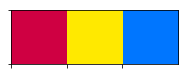

In [7]:
# Setup color palette
colors = ["#cf0042","#ffe900","#0076ff"]
color_pal = sns.color_palette(colors)
sns.palplot(color_pal)

## Overall Results

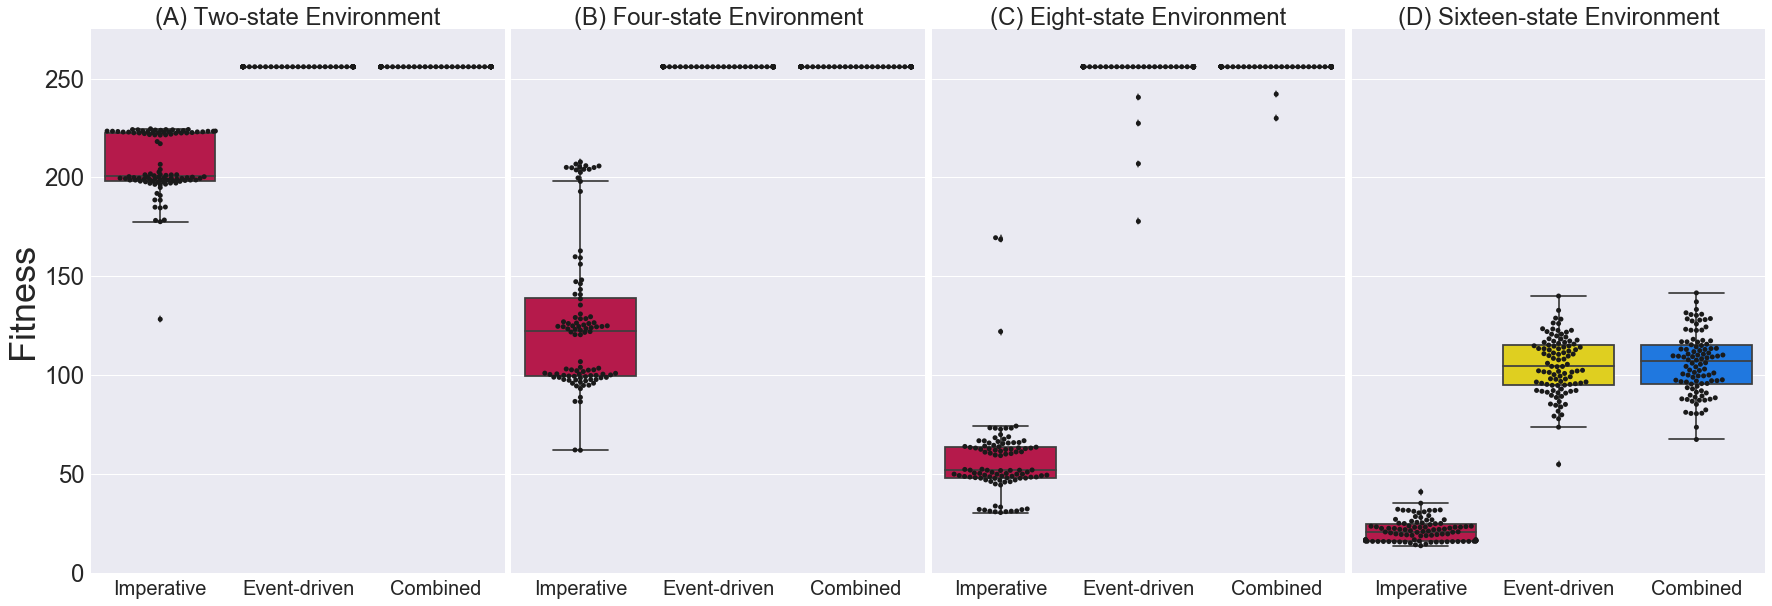

In [8]:
# Show overall results. 
labels =  ['Imperative', "Event-driven", 'Combined']

fig = plt.figure(1)
gridspec.GridSpec(1,12)
fig.set_size_inches(30,10)
sns.set(font_scale = 2)
y_lim_max = 275

x_axis_labels_fs = 24

ax2 = plt.subplot2grid((1,12), (0,0), colspan=3)
plot2 = sns.boxplot(x = "treatment", y = "fitness", data = fdom_2,  orient = "v", order=order_2, ax=ax2, palette=color_pal)
sns.swarmplot(x="treatment", y="fitness", data=fdom_2, orient="v", order=order_2, ax=ax2, color=".1")
ax2.set_xticklabels(labels)
ax2.set_xlabel("(A) Two-state Environment")
ax2.set_ylabel("Fitness")
ax2.set_ylim(0, y_lim_max)
for thing in ax2.get_yticklabels():
    thing.set_fontsize(24)
ax2.yaxis.label.set_fontsize(36)
ax2.xaxis.label.set_fontsize(x_axis_labels_fs)
ax2.xaxis.set_label_position('top') 

ax4 = plt.subplot2grid((1,12), (0,3), colspan=3, sharey=ax2)
plot4 = sns.boxplot(x = "treatment", y = "fitness", data = fdom_4,  orient = "v", order=order_4, ax=ax4, palette=color_pal)
sns.swarmplot(x="treatment", y="fitness", data=fdom_4, orient="v", order=order_4, ax=ax4, color=".1")
ax4.set_xticklabels(labels)
ax4.set_xlabel("(B) Four-state Environment")
ax4.set_ylabel("")
ax4.set_ylim(0, y_lim_max)
plt.setp(ax4.get_yticklabels(), visible = False)
ax4.xaxis.label.set_fontsize(x_axis_labels_fs)
ax4.xaxis.set_label_position('top') 

ax8 = plt.subplot2grid((1,12), (0,6), colspan=3, sharey=ax2)
plot8 = sns.boxplot(x = "treatment", y = "fitness", data = fdom_8,  orient = "v", order=order_8, ax=ax8, palette=color_pal)
sns.swarmplot(x="treatment", y="fitness", data=fdom_8, orient="v", order=order_8, ax=ax8, color=".1")
ax8.set_xticklabels(labels)
ax8.set_xlabel("(C) Eight-state Environment")
ax8.set_ylabel("")
ax8.set_ylim(0, y_lim_max)
plt.setp(ax8.get_yticklabels(), visible = False)
ax8.xaxis.label.set_fontsize(x_axis_labels_fs)
ax8.xaxis.set_label_position('top') 

ax16 = plt.subplot2grid((1,12), (0,9), colspan=3, sharey=ax2)
plot16 = sns.boxplot(x = "treatment", y = "fitness", data = fdom_16,  orient = "v", order=order_16, ax=ax16, palette=color_pal)
sns.swarmplot(x="treatment", y="fitness", data=fdom_16, orient="v", order=order_16, ax=ax16, color="0.1")
ax16.set_xticklabels(labels)
ax16.set_xlabel("(D) Sixteen-state Environment")
ax16.set_ylabel("")
ax16.set_ylim(0, y_lim_max)
plt.setp(ax16.get_yticklabels(), visible = False)
ax16.xaxis.label.set_fontsize(x_axis_labels_fs)
ax16.xaxis.set_label_position('top') 


# # Adjust spacing between environment plots. 
fig.subplots_adjust(wspace=0.05)
fig.savefig("changing_env.png", bbox_inches='tight')

## Combined Treatment Re-evaluation Results

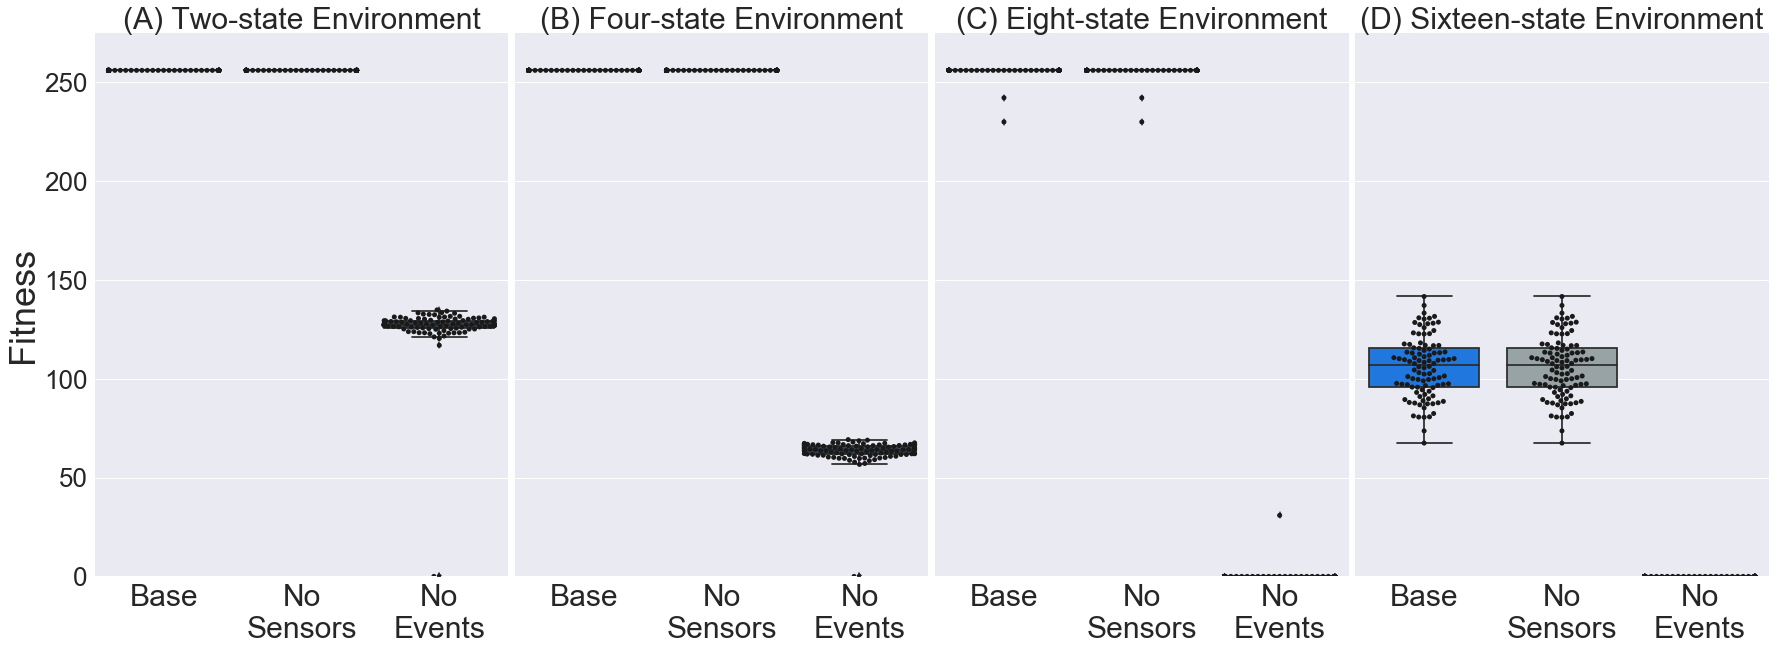

In [9]:
labels =  ['Base', "No\nSensors", 'No\nEvents']
colors = ["#0076ff", "#95a5a6", "#34495e"]
color_pal = sns.color_palette(colors)
sns.palplot(color_pal)

x_tick_fs = 30
x_axis_labels_fs = 30

y_tick_fs = 26
y_axis_label_fs = 36

fig = plt.figure(1)
gridspec.GridSpec(1,12)
fig.set_size_inches(30,10)
sns.set(font_scale = 2.5)
y_lim_max = 275

ax2 = plt.subplot2grid((1,12), (0,0), colspan=3)
plot2 = sns.boxplot(x = "analysis", y = "fitness", data = tease_df_2,  orient = "v", order=tease_order, ax=ax2, palette=color_pal)
sns.swarmplot(x="analysis", y="fitness", data=tease_df_2, orient="v", order=tease_order, ax=ax2, color=".1")
ax2.set_xticklabels(labels)
ax2.set_xlabel("(A) Two-state Environment")
ax2.set_ylabel("Fitness")
ax2.set_ylim(0, y_lim_max)
for thing in ax2.get_yticklabels():
    thing.set_fontsize(y_tick_fs)
for thing in ax2.get_xticklabels():
    thing.set_fontsize(x_tick_fs)
ax2.yaxis.label.set_fontsize(y_axis_label_fs)
ax2.xaxis.label.set_fontsize(x_axis_labels_fs)
ax2.xaxis.set_label_position('top') 

ax4 = plt.subplot2grid((1,12), (0,3), colspan=3, sharey=ax2)
plot4 = sns.boxplot(x = "analysis", y = "fitness", data = tease_df_4,  orient = "v", order=tease_order, ax=ax4, palette=color_pal)
sns.swarmplot(x="analysis", y="fitness", data=tease_df_4, orient="v", order=tease_order, ax=ax4, color=".1")
ax4.set_xticklabels(labels)
ax4.set_xlabel("(B) Four-state Environment")
ax4.set_ylabel("")
ax4.set_ylim(0, y_lim_max)
for thing in ax4.get_xticklabels():
    thing.set_fontsize(x_tick_fs)
plt.setp(ax4.get_yticklabels(), visible = False)
ax4.xaxis.label.set_fontsize(x_axis_labels_fs)
ax4.xaxis.set_label_position('top') 

ax8 = plt.subplot2grid((1,12), (0,6), colspan=3, sharey=ax2)
plot8 = sns.boxplot(x = "analysis", y = "fitness", data = tease_df_8,  orient = "v", order=tease_order, ax=ax8, palette=color_pal)
sns.swarmplot(x="analysis", y="fitness", data=tease_df_8, orient="v", order=tease_order, ax=ax8, color=".1")
ax8.set_xticklabels(labels)
ax8.set_xlabel("(C) Eight-state Environment")
ax8.set_ylabel("")
ax8.set_ylim(0, y_lim_max)
for thing in ax8.get_xticklabels():
    thing.set_fontsize(x_tick_fs)
plt.setp(ax8.get_yticklabels(), visible = False)
ax8.xaxis.label.set_fontsize(x_axis_labels_fs)
ax8.xaxis.set_label_position('top') 

ax16 = plt.subplot2grid((1,12), (0,9), colspan=3, sharey=ax2)
plot16 = sns.boxplot(x = "analysis", y = "fitness", data = tease_df_16,  orient = "v", order=tease_order, ax=ax16, palette=color_pal)
sns.swarmplot(x="analysis", y="fitness", data=tease_df_16, orient="v", order=tease_order, ax=ax16, color="0.1")
ax16.set_xticklabels(labels)
ax16.set_xlabel("(D) Sixteen-state Environment")
ax16.set_ylabel("")
ax16.set_ylim(0, y_lim_max)
for thing in ax16.get_xticklabels():
    thing.set_fontsize(x_tick_fs)
plt.setp(ax16.get_yticklabels(), visible = False)
ax16.xaxis.label.set_fontsize(x_axis_labels_fs)
ax16.xaxis.set_label_position('top') 


# # Adjust spacing between environment plots. 
fig.subplots_adjust(wspace=0.05)
fig.savefig("tease_changing_env.png", bbox_inches='tight')